In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [67]:
# Multi-Attention EfficientNet

import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
from kaggle_datasets import KaggleDatasets

import os, warnings
from sklearn import model_selection
warnings.simplefilter('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf; print(tf.__version__)
from tensorflow import keras; print(keras.__version__)
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import schedules

2.6.4
2.6.0


In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import schedules
import efficientnet.tfkeras as efn

In [69]:
# import data from yahoo finance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import math
import random

In [70]:
df=yf.download('AAPL',start='2010-01-01',end='2020-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


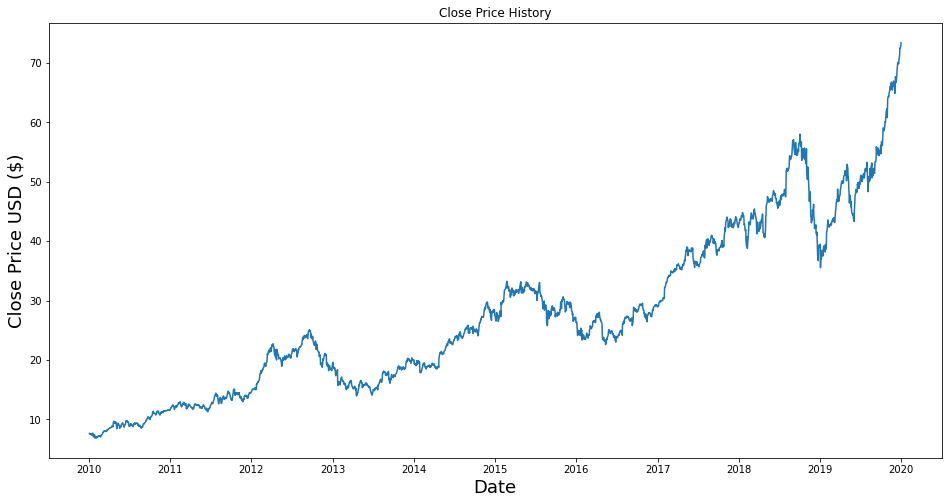

In [71]:
# plot the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [72]:
# create a new dataframe with only the close column
data=df.filter(['Close'])
# convert the dataframe to a numpy array
dataset=data.values
# get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [73]:
# create the training dataset
# create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
# split the data into x_train and y_train datasets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

# convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

# reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

[array([1.17842676e-02, 1.19828232e-02, 1.01529343e-02, 9.94363872e-03,
       1.06949161e-02, 9.69144086e-03, 8.40889292e-03, 9.98120331e-03,
       9.32652775e-03, 7.44834148e-03, 1.23369893e-02, 1.05607712e-02,
       8.59670868e-03, 3.05875169e-03, 5.91359568e-03, 7.45370785e-03,
       8.49476200e-03, 3.88515107e-03, 5.35920459e-06, 1.43814399e-03,
       2.04452939e-03, 3.85295285e-03, 0.00000000e+00, 1.82987462e-03,
       1.11080262e-03, 2.22161957e-03, 1.64742522e-03, 3.55244334e-03,
       4.47007816e-03, 6.09068587e-03, 5.63455881e-03, 5.83846651e-03,
       5.16231831e-03, 4.49153647e-03, 2.68847937e-03, 4.62033650e-03,
       5.33940849e-03, 6.74536143e-03, 9.09042183e-03, 9.01529266e-03,
       9.27285689e-03, 1.00134015e-02, 1.44351967e-02, 1.45049595e-02,
       1.66192588e-02, 1.75959094e-02, 1.79500754e-02, 1.85403761e-02,
       1.70592940e-02, 1.73866282e-02, 1.72095451e-02, 1.74939555e-02,
       1.62060556e-02, 1.75476192e-02, 1.94848284e-02, 2.00268245e-02,
     

(1953, 60, 1)

In [74]:

# build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [75]:
# build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [76]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1953/1953 [==============================] - 50s 24ms/step - loss: 4.1032e-04


In [77]:
test_data=scaled_data[training_data_len-60:,:]
# create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [78]:
# convert the data to a numpy array
x_test=np.array(x_test)

In [79]:
# reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [80]:

# get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.9127083810612885

In [81]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

2013

In [82]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [83]:

# Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
# Split the data into x_train and y_train data sets
x_train=[]
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1953, 60, 1)

In [84]:
# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [85]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1953/1953 [==============================] - 51s 24ms/step - loss: 3.4752e-04


In [87]:
test_data = scaled_data[training_data_len - 60: , : ]
# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1 ))
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse



1.392767953665344

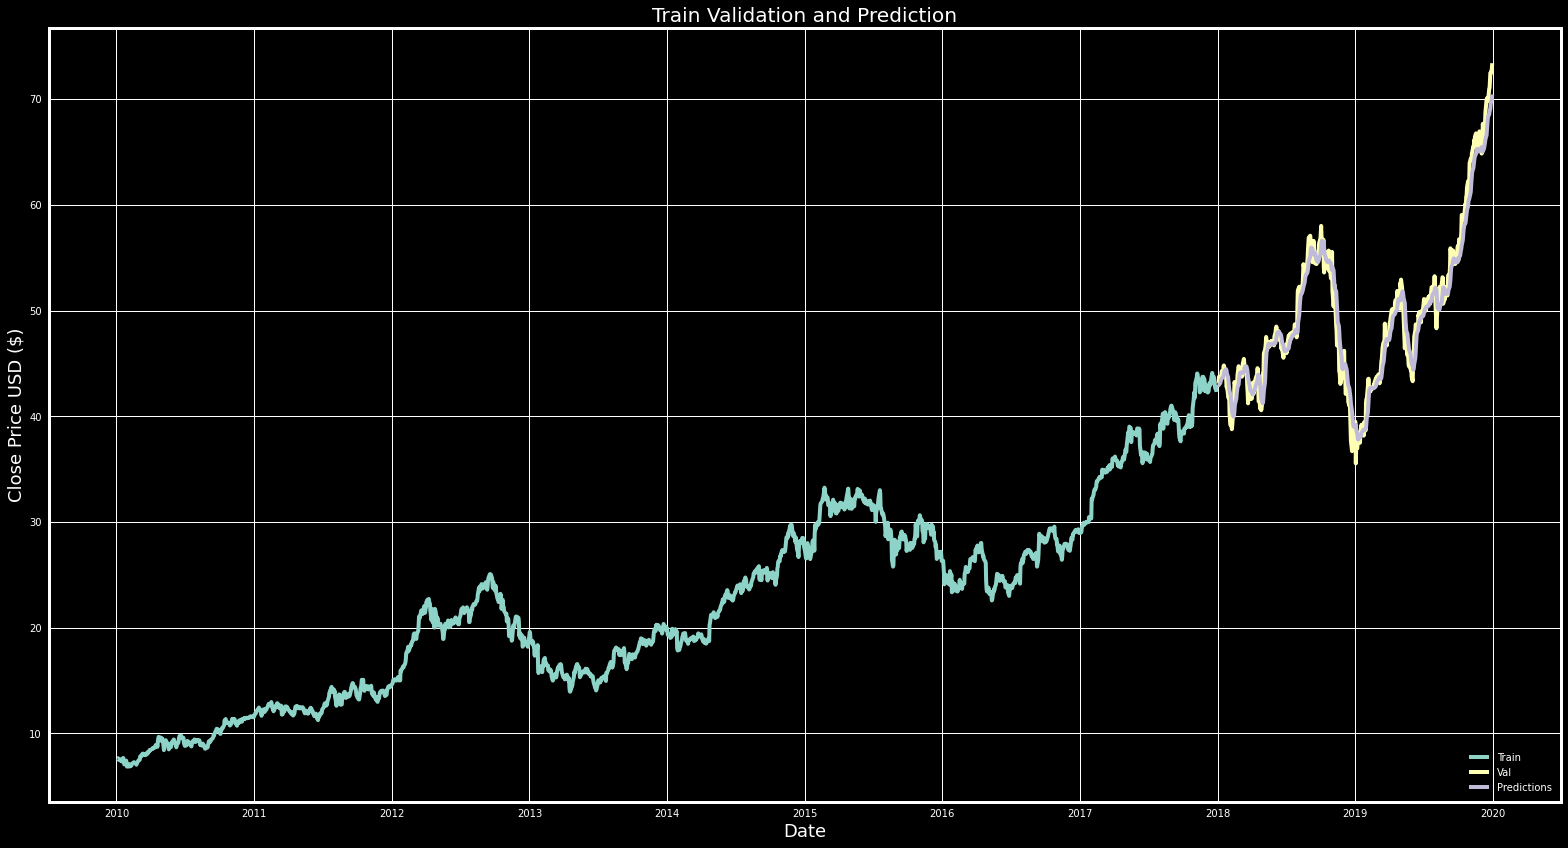

In [104]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.rcParams['figure.figsize'] = [22, 12]
plt.title('Train Validation and Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.tight_layout()
plt.show()

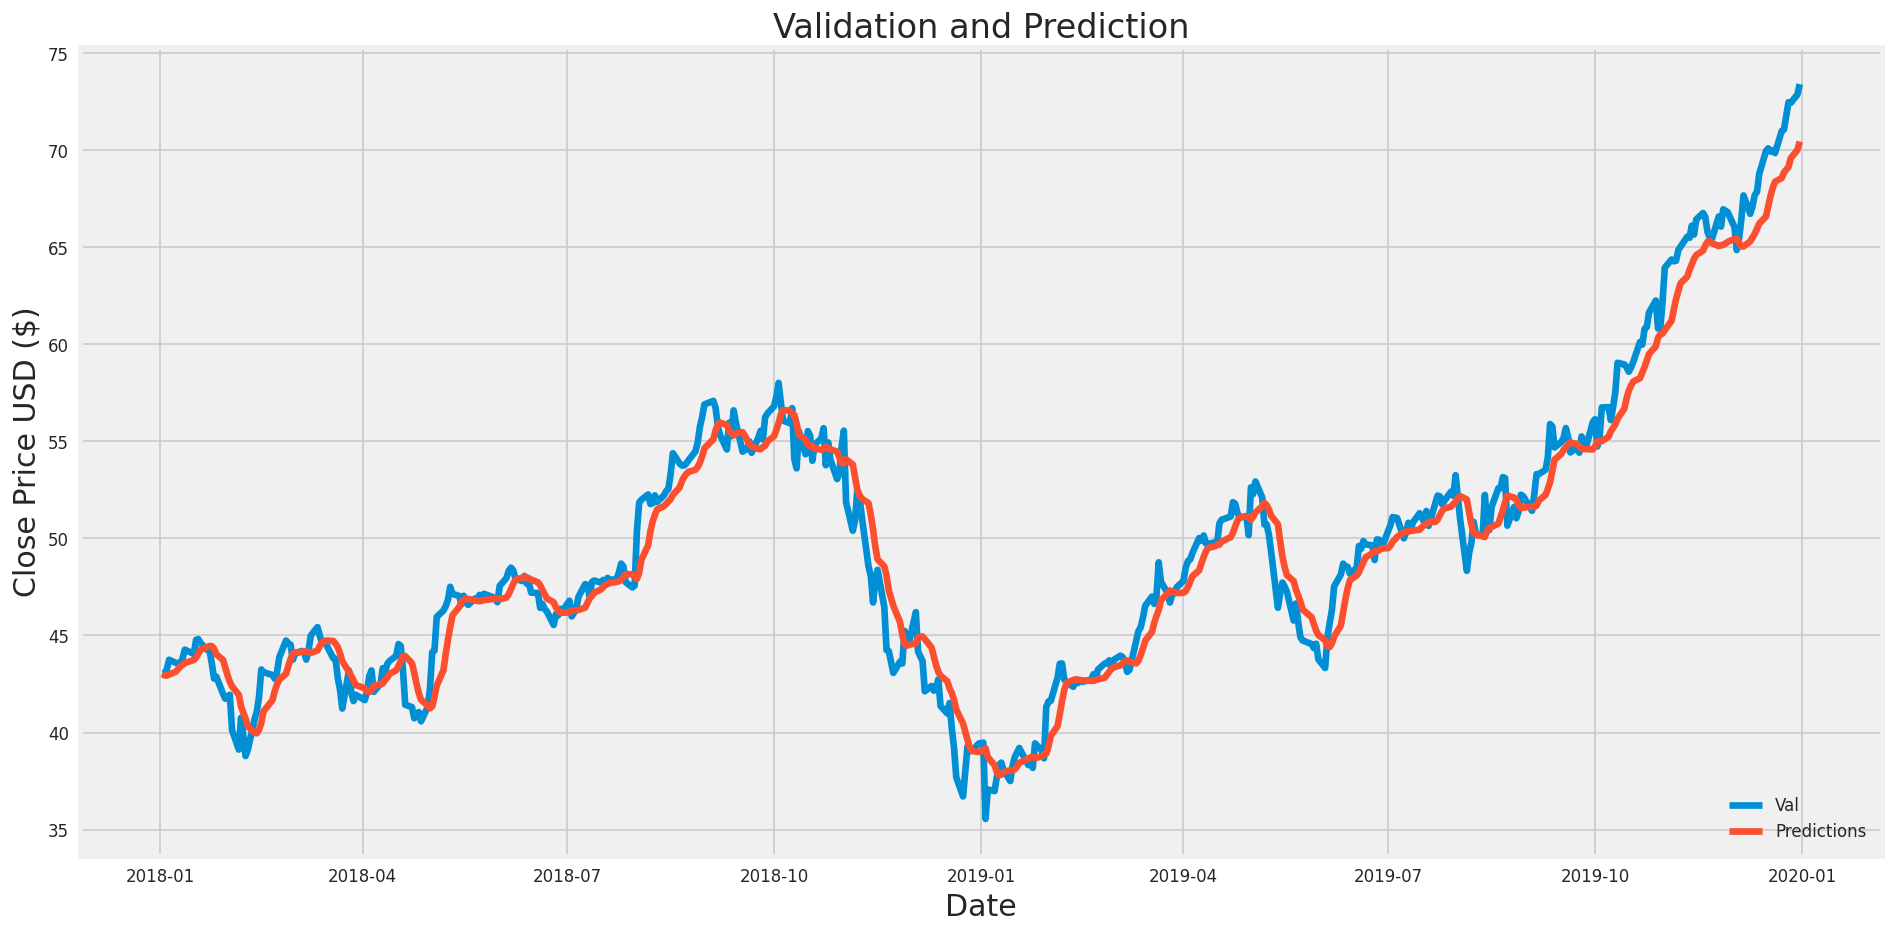

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)
# plor r2_score
plt.figure(figsize=(16,8), dpi=120, facecolor='w', edgecolor='k', frameon=True)
plt.title('Validation and Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.tight_layout()
# plt.style.use('fivethirtyeight')
plt.style.use("dark_background")
plt.show()

In [112]:
for i in range(len(predictions)):
    print("Predicted price: ", predictions[i], "Actual price: ", y_test[i])
    

Predicted price:  [43.016495] Actual price:  [43.06499863]
Predicted price:  [42.9421] Actual price:  [43.05749893]
Predicted price:  [42.93287] Actual price:  [43.25749969]
Predicted price:  [42.9856] Actual price:  [43.75]
Predicted price:  [43.13246] Actual price:  [43.58750153]
Predicted price:  [43.27382] Actual price:  [43.58250046]
Predicted price:  [43.39227] Actual price:  [43.57249832]
Predicted price:  [43.48128] Actual price:  [43.81999969]
Predicted price:  [43.580856] Actual price:  [44.27249908]
Predicted price:  [43.73696] Actual price:  [44.04750061]
Predicted price:  [43.858936] Actual price:  [44.77500153]
Predicted price:  [44.05808] Actual price:  [44.81499863]
Predicted price:  [44.264366] Actual price:  [44.61500168]
Predicted price:  [44.412632] Actual price:  [44.25]
Predicted price:  [44.458195] Actual price:  [44.25999832]
Predicted price:  [44.453445] Actual price:  [43.55500031]
Predicted price:  [44.319557] Actual price:  [42.77750015]
Predicted price:  [4

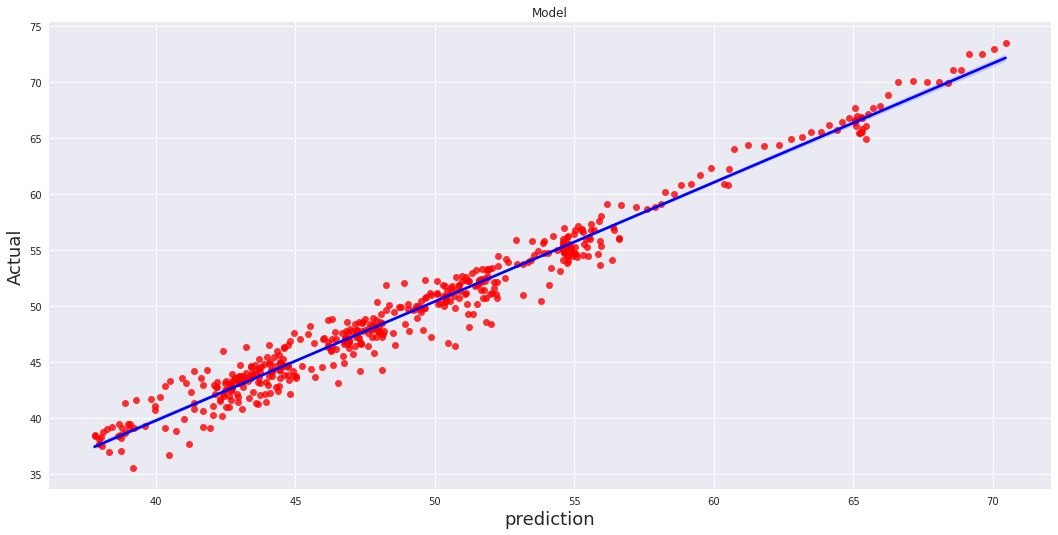

In [118]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
# plt.plot(predictions, y_test) 
sns.regplot(x=predictions, y=y_test, data=valid, fit_reg=True, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.style.use("seaborn")
plt.show()


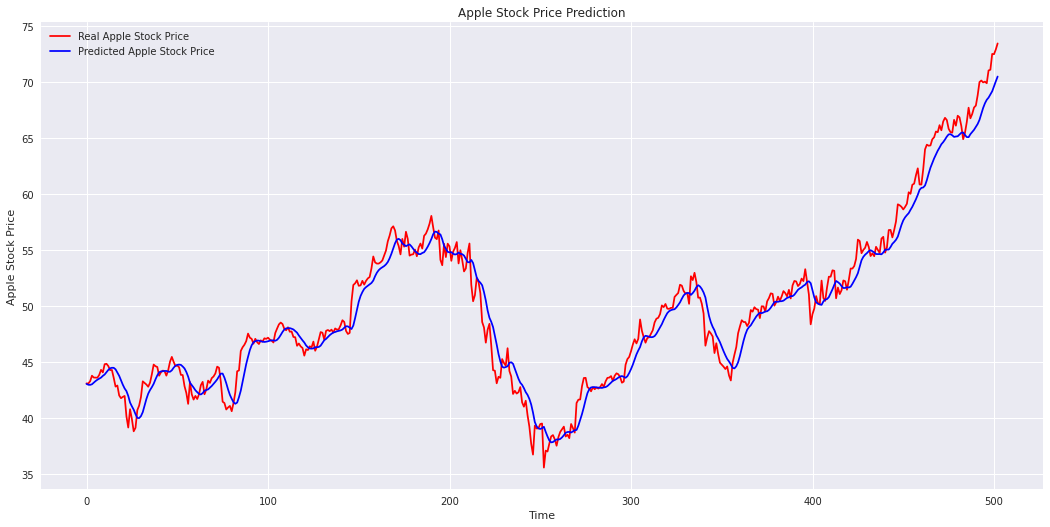

In [119]:
plt.figure(figsize=(16,8))
# make it clear and readable 
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Mean Squared Error: %.3f "% mean_squared_error(y_test, predictions))
print("Mean Absolute Error: %.3f "% mean_absolute_error(y_test, predictions))
print("R2 Score: %.3f "% r2_score(y_test, predictions))

Mean Squared Error: 1.940 
Mean Absolute Error: 1.084 
R2 Score: 0.965 


In [128]:
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)


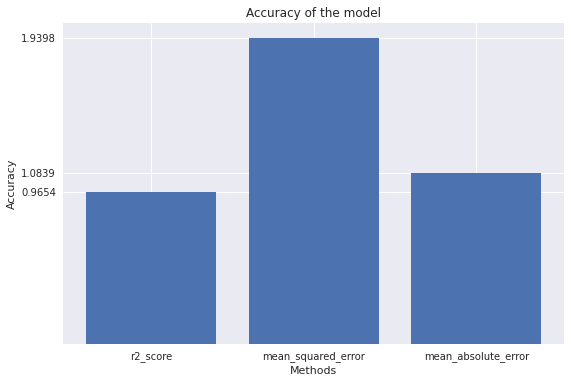

In [130]:
accuracies = [r2_score(y_test, predictions), mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions)]
methods = ['r2_score', 'mean_squared_error', 'mean_absolute_error']
plt.bar(methods, accuracies)
plt.title('Accuracy of the model')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.xticks(methods)
plt.yticks(accuracies)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [16, 8]
plt.show()


Accuracy:  0.9654477188317767
Accuracy:  1.9398025727571497
Accuracy:  1.0838557218699523


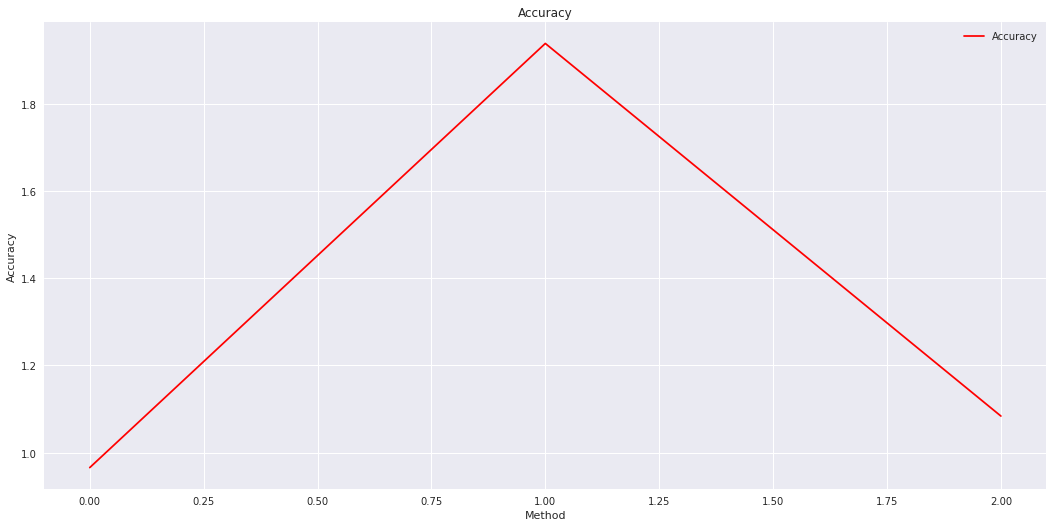

In [129]:
accuracies = [r2_score(y_test, predictions), mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions)]
for i in range(len(accuracies)):
    print("Accuracy: ", accuracies[i])
plt.figure(figsize=(16,8))
plt.plot(accuracies, color = 'red', label = 'Accuracy')
plt.title('Accuracy')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.legend()
plt.show()